In [84]:
f=open('./inferno.txt')
texts=f.readlines()
f.close()
texts[140:160]
#texts[170]

['from work and weariness; and I myself\n',
 'alone prepared to undergo the battle\n',
 'both of the journeying and of the pity,\n',
 'which memory, mistaking not, shall show.\n',
 'O Muses, o high genius, help me now; \n',
 'o memory that set down what I saw,\n',
 'here shall your excellence reveal itself!\n',
 'I started: “Poet, you who are my guide,\n',
 'see if the force in me is strong enough\n',
 'before you let me face that rugged pass.\n',
 'You say that he who fathered Sylvius, \n',
 'while he was still corruptible, had journeyed\n',
 'into the deathless world with his live body.\n',
 'For, if the Enemy of every evil\n',
 'was courteous to him, considering\n',
 'all he would cause and who and what he was,\n',
 'that does not seem incomprehensible,\n',
 'since in the empyrean heaven he was chosen\n',
 'to father honored Rome and her empire;\n',
 'and if the truth be told, Rome and her realm\n']

In [85]:
import nltk
# nltk.download('averaged_perceptron_tagger')
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('stopwords')

In [86]:
# 删除数字/标点符号，分词
import string
from nltk import word_tokenize

remove_chars = string.digits+string.punctuation +'\n' + '“' + '’'+'”'
remove_map = str.maketrans(remove_chars, " " * len(remove_chars))

sentences_list = [word_tokenize(t.translate(remove_map).lower()) for t in texts]
print(remove_chars)
sentences_list[110:120]

0123456789!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
“’”


[['until', 'he', 'thrusts', 'her', 'back', 'again', 'to', 'hell'],
 ['from', 'which', 'she', 'was', 'first', 'sent', 'above', 'by', 'envy'],
 ['therefore', 'i', 'think', 'and', 'judge', 'it', 'best', 'for', 'you'],
 ['to', 'follow', 'me', 'and', 'i', 'shall', 'guide', 'you', 'taking'],
 ['you', 'from', 'this', 'place', 'through', 'an', 'eternal', 'place'],
 ['where', 'you', 'shall', 'hear', 'the', 'howls', 'of', 'desperation'],
 ['and', 'see', 'the', 'ancient', 'spirits', 'in', 'their', 'pain'],
 ['as', 'each', 'of', 'them', 'laments', 'his', 'second', 'death'],
 ['and', 'you', 'shall', 'see', 'those', 'souls', 'who', 'are', 'content'],
 ['within', 'the', 'fire', 'for', 'they', 'hope', 'to', 'reach']]

In [113]:
search_word = 'make'
for i,s in enumerate(sentences_list):
    if search_word in s:
        print(i,s)
        break
count = 0
for s in sentences_list:
    count += s.count(search_word)
print(count)
#print(sentences_list[115])

48 ['this', 'lion', 'seemed', 'to', 'make', 'his', 'way', 'against', 'me']
37


In [98]:
# delete the stopwords
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))
stopWords |= {'one','upon'}
#stopWords -|= {'one'}
print(stopWords)

sentences_without_sw = [[w for w in s if w not in stopWords] for s in sentences_list]
sentences_without_sw[110:120]

{'you', 'of', "couldn't", 'only', 'haven', 'such', 'm', 'same', 'nor', 'as', "doesn't", 'shouldn', 'at', 'how', 'then', 'will', 'don', 'very', 'ain', 'each', 'yourself', 'd', 'there', 'her', 'during', "it's", 'them', 'being', 'is', 'while', 'mustn', "wasn't", 'won', 'his', 're', 's', 'yourselves', 'i', 'hadn', 'have', 'or', 'until', 'just', "wouldn't", 'am', 'does', 'what', "won't", 'were', 'should', 'myself', 'doesn', 'again', 'my', 'who', 'be', 'by', "isn't", 'hers', 'once', 'one', 'most', 'doing', 'your', 'than', "she's", 'its', 'wouldn', 'against', "hadn't", 'ourselves', 'hasn', 'from', "needn't", "shan't", 'a', 'and', 'here', 'themselves', 'before', 'couldn', 'him', 'when', 'whom', 'we', 'now', 'they', "hasn't", 'few', 'been', "mightn't", 'if', 't', 'through', 'any', 'it', 'in', 'where', 'not', 'with', "you're", "that'll", 'll', "you'd", "aren't", 'she', 'was', 'ma', "you'll", 'so', 'can', 'on', 'after', 'theirs', "didn't", 'shan', 'below', 'mightn', 'under', 'about', 'an', 'needn

[['thrusts', 'back', 'hell'],
 ['first', 'sent', 'envy'],
 ['therefore', 'think', 'judge', 'best'],
 ['follow', 'shall', 'guide', 'taking'],
 ['place', 'eternal', 'place'],
 ['shall', 'hear', 'howls', 'desperation'],
 ['see', 'ancient', 'spirits', 'pain'],
 ['laments', 'second', 'death'],
 ['shall', 'see', 'souls', 'content'],
 ['within', 'fire', 'hope', 'reach']]

In [99]:
search_word = '”'
for i,s in enumerate(sentences_without_sw):
    if search_word in s:
        print(i,s)
        break
count = 0
for s in sentences_without_sw:
    count += s.count(search_word)
print(count)

0


In [100]:
# 标注词形
from nltk import pos_tag

tagged_sentences = [pos_tag(s) for s in sentences_without_sw]
tagged_sentences[110:120]

[[('thrusts', 'NNS'), ('back', 'RB'), ('hell', 'VBP')],
 [('first', 'RB'), ('sent', 'VBN'), ('envy', 'NN')],
 [('therefore', 'RB'), ('think', 'VBP'), ('judge', 'NN'), ('best', 'JJS')],
 [('follow', 'VB'), ('shall', 'MD'), ('guide', 'VB'), ('taking', 'VBG')],
 [('place', 'NN'), ('eternal', 'JJ'), ('place', 'NN')],
 [('shall', 'MD'), ('hear', 'VB'), ('howls', 'JJ'), ('desperation', 'NN')],
 [('see', 'VB'), ('ancient', 'JJ'), ('spirits', 'NNS'), ('pain', 'VBP')],
 [('laments', 'NNS'), ('second', 'JJ'), ('death', 'NN')],
 [('shall', 'MD'), ('see', 'VB'), ('souls', 'JJ'), ('content', 'NN')],
 [('within', 'IN'), ('fire', 'NNS'), ('hope', 'VBP'), ('reach', 'NN')]]

In [101]:
# 词形还原
from nltk.corpus import wordnet
from nltk import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
tag_dict = {"J": wordnet.ADJ,
            "N": wordnet.NOUN,
            "V": wordnet.VERB,
            "R": wordnet.ADV}
lemmatized_sentences = [[
        lemmatizer.lemmatize(w[0],tag_dict[w[1][0]]) if tag_dict.get(w[1][0], None) else w[0] for w in s 
    ] for s in tagged_sentences]
lemmatized_sentences[110:120]

[['thrust', 'back', 'hell'],
 ['first', 'send', 'envy'],
 ['therefore', 'think', 'judge', 'best'],
 ['follow', 'shall', 'guide', 'take'],
 ['place', 'eternal', 'place'],
 ['shall', 'hear', 'howls', 'desperation'],
 ['see', 'ancient', 'spirit', 'pain'],
 ['lament', 'second', 'death'],
 ['shall', 'see', 'souls', 'content'],
 ['within', 'fire', 'hope', 'reach']]

In [102]:
search_word = '”'
for i,s in enumerate(lemmatized_sentences):
    if search_word in s:
        print(i,s)
        break
count = 0
for s in lemmatized_sentences:
    count += s.count(search_word)
print(count)

0


In [81]:
# 提取词干 暂时不做
from nltk import PorterStemmer
stemmer = PorterStemmer()
print(lemmatizer.lemmatize('women','n'))
print(stemmer.stem('women'))
print(lemmatizer.lemmatize('men','n'))

woman
women
men


In [23]:
# 词袋
# from gensim import corpora
# Dictionary = corpora.Dictionary(lemmatized_sentences)
# sentence_bows = [Dictionary.doc2bow(s) for s in lemmatized_sentences]
# sentence_bows[110:120]

In [103]:
# inferno_cleaned = ""
# n_words = 0
# for s in lemmatized_sentences:
#     inferno_cleaned += ' '.join(s)+' '
#     n_words += len(s)
    
# books = [s.split(' ') for s in theAeneid_cleaned.split('book')[1:]]
# theAeneid_cleaned = theAeneid_cleaned.split(' ')

# print(n_words, len(theAeneid_cleaned))
# len(books)

# inferno = ""
# n_words = 0
# for s in lemmatized_sentences:
#     inferno += ' '.join(s)+' '
#     n_words += len(s)
# print(n_words, len(inferno))

inferno = []
n_words = 0
for s in lemmatized_sentences:
    inferno += s
    n_words += len(s)
print(n_words, len(inferno))
search_word = 'go'
print(inferno.count(search_word))

17000 17000
67


In [107]:
search_word = '”'
print(inferno.count(search_word))
# inferno[2000:2200]

0


In [115]:
# 统计词频
from nltk.probability import FreqDist
fd = FreqDist(inferno)
print(fd.most_common(22))

[('say', 187), ('see', 177), ('make', 141), ('us', 121), ('upon', 100), ('come', 97), ('saw', 93), ('master', 83), ('turn', 81), ('let', 80), ('take', 80), ('still', 79), ('tell', 78), ('eye', 77), ('way', 76), ('leave', 73), ('guide', 72), ('face', 71), ('word', 71), ('place', 69), ('go', 67), ('like', 66)]


In [27]:
# 分章节词频统计
# for i,b in enumerate(books):
#     fdist = FreqDist(b)
#     tops=fdist.most_common(10)
#     print(f"BOOK {i+1}:{tops}")

BOOK 1:[('”', 199), ('“', 196), ('’', 137), ('say', 84), ('make', 62), ('us', 53), ('see', 52), ('come', 45), ('upon', 44), ('turn', 36)]
BOOK 2:[('’', 232), ('”', 204), ('“', 202), ('see', 101), ('say', 85), ('make', 63), ('us', 50), ('upon', 48), ('saw', 48), ('take', 43)]


Text(0.5, 1.0, 'Top 20 Most Frequent Words in the Inferno')

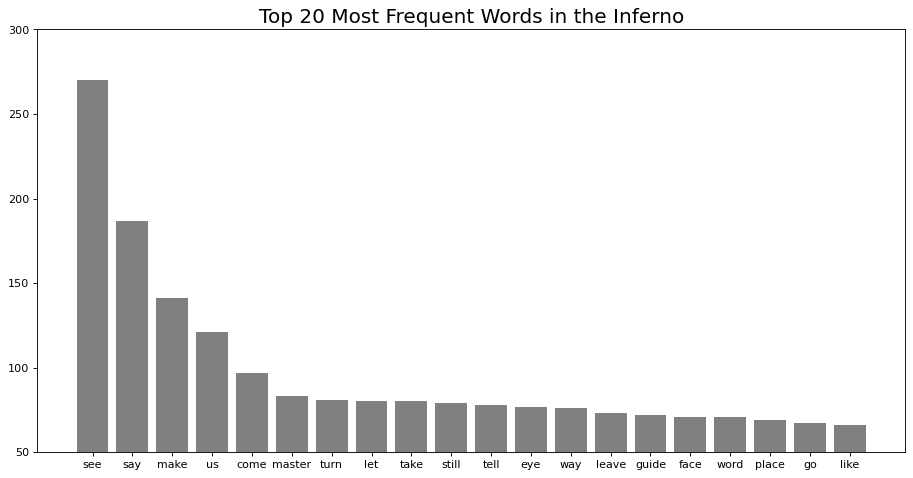

In [119]:
import numpy as np
import matplotlib.pyplot as plt

datas = np.array([('see', 270),('say', 187),  ('make', 141), ('us', 121), ('come', 97), ('master', 83), ('turn', 81),
                  ('let', 80), ('take', 80), ('still', 79), ('tell', 78), ('eye', 77), ('way', 76),
                  ('leave', 73), ('guide', 72), ('face', 71), ('word', 71), ('place', 69), ('go', 67), ('like', 66)])
x, y = datas[:,0], datas[:,1].astype(np.int64)

fig, ax = plt.subplots(figsize=(14, 7),dpi=80)
plt.ylim(50,300)
ax.bar(x=x, height=y, width=0.8,  # 柱子宽度，默认0.8，两根柱子中心的距离默认为1.0
    align="center",  # 柱子的对齐方式，'center' or 'edge'
    color="grey",  # 柱子颜色
   # edgecolor="red",  # 柱子边框的颜色
    linewidth=2.0  )
ax.set_title("Top 20 Most Frequent Words in the Inferno", fontsize=18)

Text(0.5, 1.0, 'Top 10 Most Frequent Words in Book IV')

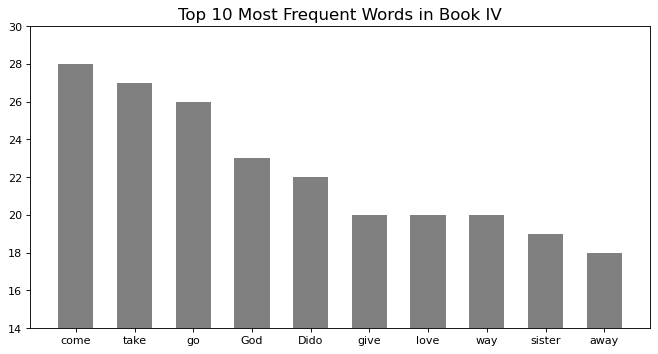

In [75]:
import numpy as np
import matplotlib.pyplot as plt

datas = np.array([('come', 28), ('take', 27), ('go', 26), ('God', 23), ('Dido', 22), 
                  ('give', 20), ('love', 20), ('way', 20), ('sister', 19), ('away', 18)])
x, y = datas[:,0], datas[:,1].astype(np.int64)

fig, ax = plt.subplots(figsize=(10, 5),dpi=80)
plt.ylim(14,30)
ax.bar(x=x, height=y, width=0.6,  # 柱子宽度，默认0.8，两根柱子中心的距离默认为1.0
    align="center",  # 柱子的对齐方式，'center' or 'edge'
    color="grey",  # 柱子颜色
   # edgecolor="red",  # 柱子边框的颜色
    linewidth=2.0  )
ax.set_title("Top 10 Most Frequent Words in Book IV", fontsize=15)

Text(0.5, 1.0, 'Top 10 Most Frequent Words in Book XII')

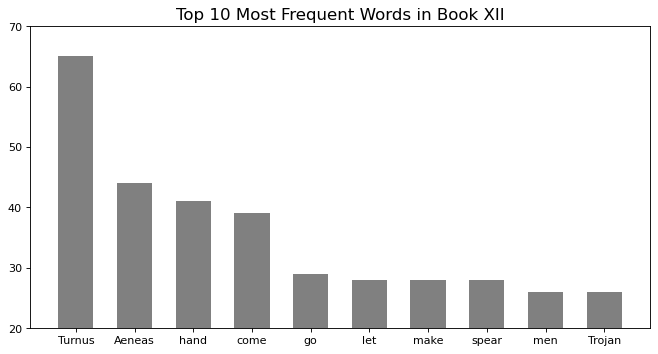

In [77]:
import numpy as np
import matplotlib.pyplot as plt

datas = np.array([('Turnus', 65), ('Aeneas', 44), ('hand', 41), ('come', 39), ('go', 29), 
                  ('let', 28), ('make', 28), ('spear', 28), ('men', 26), ('Trojan', 26)])
x, y = datas[:,0], datas[:,1].astype(np.int64)

fig, ax = plt.subplots(figsize=(10, 5),dpi=80)
plt.ylim(20,70)
ax.bar(x=x, height=y, width=0.6,  # 柱子宽度，默认0.8，两根柱子中心的距离默认为1.0
    align="center",  # 柱子的对齐方式，'center' or 'edge'
    color="grey",  # 柱子颜色
   # edgecolor="red",  # 柱子边框的颜色
    linewidth=2.0  )
ax.set_title("Top 10 Most Frequent Words in Book XII", fontsize=15)

Text(0.5, 1.0, 'Top 20 Most Frequent Words in the Aeneid')

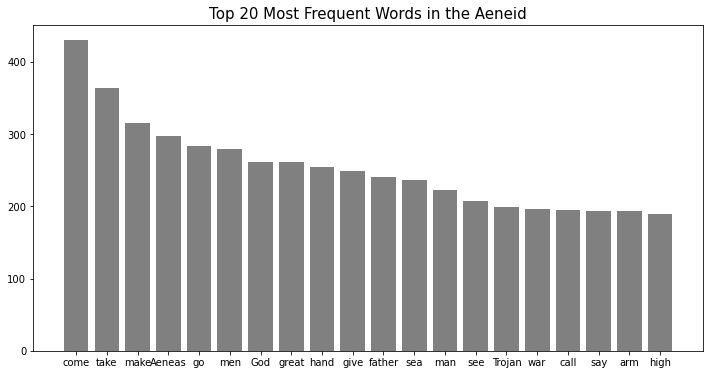

In [22]:
import numpy as np
import matplotlib.pyplot as plt
x = ["come", "take", "make", "Aeneas", "go", "men", "God", "great","hand", "give", "father", "sea", "man", "see", "Trojan", "war","call","say","arm","high"]
y = [430, 364, 316, 297, 283, 280, 262, 262, 255, 249, 241, 237, 222, 207, 199, 196, 195, 194, 193,189]

# 柱状图和散点图不同，散点图的(x,y)均为数值变量
# 柱状图的x轴显示分类变量，有两种处理方式
# 方式1：自己创建x轴坐标，并提供对应的标签
# 方式2：让Matplotlib自动完成映射

# 方式1
# xticks = np.arange(len(x))  # 每根柱子的x轴坐标
# xlabels = x  # 每根柱子的标签
# fig, ax = plt.subplots(figsize=(10, 7))
# ax.bar(x=xticks, height=y, tick_label=xlabels)

# 方式2（推荐）
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x=x, height=y, width=0.8,  # 柱子宽度，默认0.8，两根柱子中心的距离默认为1.0
    align="center",  # 柱子的对齐方式，'center' or 'edge'
    color="grey",  # 柱子颜色
   # edgecolor="red",  # 柱子边框的颜色
    linewidth=2.0  )
ax.set_title("Top 20 Most Frequent Words in the Aeneid", fontsize=15)

Text(0.5, 1.0, 'Top 10 Most Frequent Words in Book XII')

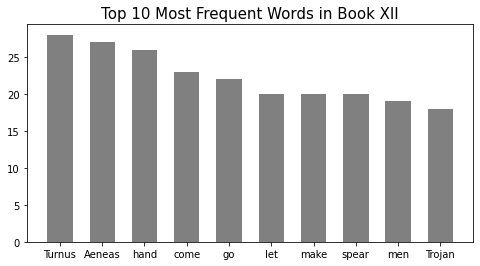

In [18]:
import numpy as np
import matplotlib.pyplot as plt
x = ["Turnus", "Aeneas", "hand", "come", "go", "let", "make", "spear", "men", "Trojan"]
y = [28, 27, 26, 23, 22, 20, 20, 20, 19, 18]

# 柱状图和散点图不同，散点图的(x,y)均为数值变量
# 柱状图的x轴显示分类变量，有两种处理方式
# 方式1：自己创建x轴坐标，并提供对应的标签
# 方式2：让Matplotlib自动完成映射

# 方式1
# xticks = np.arange(len(x))  # 每根柱子的x轴坐标
# xlabels = x  # 每根柱子的标签
# fig, ax = plt.subplots(figsize=(8, 7))
# ax.bar(x=xticks, height=y, tick_label=xlabels)

# 方式2（推荐）
fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(x=x, height=y, width=0.6,  # 柱子宽度，默认0.8，两根柱子中心的距离默认为1.0
    align="center",  # 柱子的对齐方式，'center' or 'edge'
    color="grey",  # 柱子颜色
    #edgecolor="red",  # 柱子边框的颜色
    linewidth=2.0  )
